We set out to investigate the `twitter_archive_master.csv` and `image_predictions_master.csv` datasets which represent a subset of tweets by `WeRateDogs`. 
At the outset, we were looking to answer the following questions.

- Doggie Tweet demographics on WeRateDogs- most commonly tweeted about dog stage, breed etc
- Factors that lead to higher ratings- is it influenced by dog category or (predicted) dog breed.
- Factors that encourage user engagement- do higher retweets and favorites correlate with higher ratings or is it skewed by factors such as day of posting (do weekend posts get higher engagement?)

We used pandas and matplotlib for analysis. Below is the code snippet for generating a dataframe merged from the two datasources, and some helper routines that we will use for analysis.

In [1]:
import json
import pandas as pd
import tweepy
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from timeit import default_timer as timer

sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_1d_bar(df, grouper, target_label='rating_numerator', color='orangered'):
    """
    Plot 1d bar chart showing average target values across each category of the predictor
    """
    width=0.8
    target_means = df.groupby(grouper)[target_label].mean()
    print(target_means)
    target_means.plot(kind='bar', width=width, color=color, alpha=0.5)
    plt.title('Average of %s across %s' % (target_label, grouper))
    plt.xlabel(grouper)
    plt.ylabel('Average %s' % (target_label))
    plt.show();

In [3]:
df_twtr_clean = pd.read_csv('twitter_archive_master.csv')
df_img_pred_clean = pd.read_csv('image_predictions_master.csv')
df_twtr_joined_clean = pd.merge(df_twtr_clean, df_img_pred_clean, on=['tweet_id'], how='left')

Here are some of the interesting insights we got from the analysis.

# Retrieverywhere

Golden retrievers are the most ubiquitous interms of total number of tweets they are in- which is around 6% of total tweets and about 12% of the dogs predicted (with > 50% confidence).

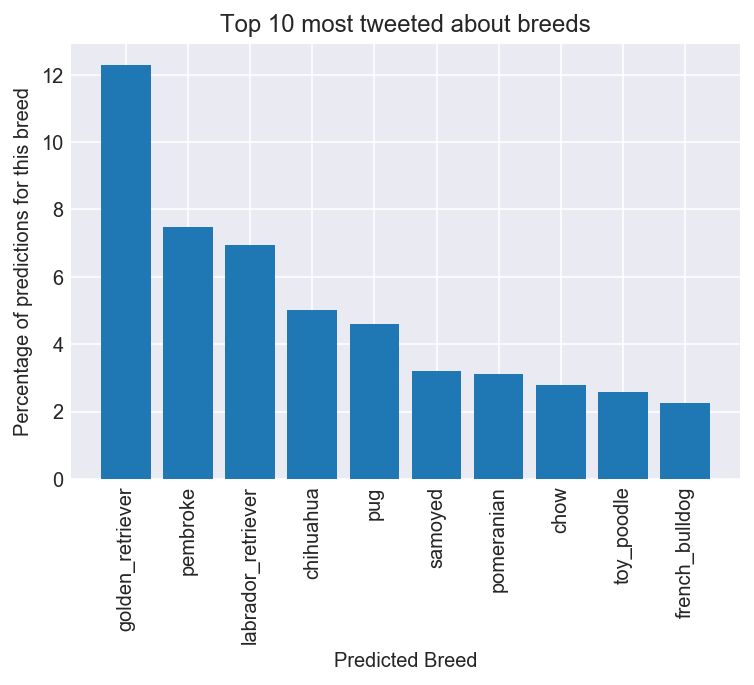

In [4]:
sorted_dog_counts = df_img_pred_clean.predicted_dog.value_counts()
unknown_count = sorted_dog_counts.tolist()[0]
num_tweets = df_img_pred_clean.shape[0]
num_predicted = num_tweets - unknown_count
x = list(range(1, 11))
y = [dog_count * 100 / num_predicted for dog_count in sorted_dog_counts.tolist()[1:11]]
xticks =  sorted_dog_counts.keys().tolist()[1:11]
plt.xticks(x, xticks, rotation='vertical')
plt.title('Top 10 most tweeted about breeds')
plt.xlabel('Predicted Breed')
plt.ylabel('Percentage of predictions for this breed')
plt.bar(x, y)
plt.show();

# Quality vs Quantity

We find that none of the top 10 most tweeted about dog breeds are in the top 10 rated dog breeds.

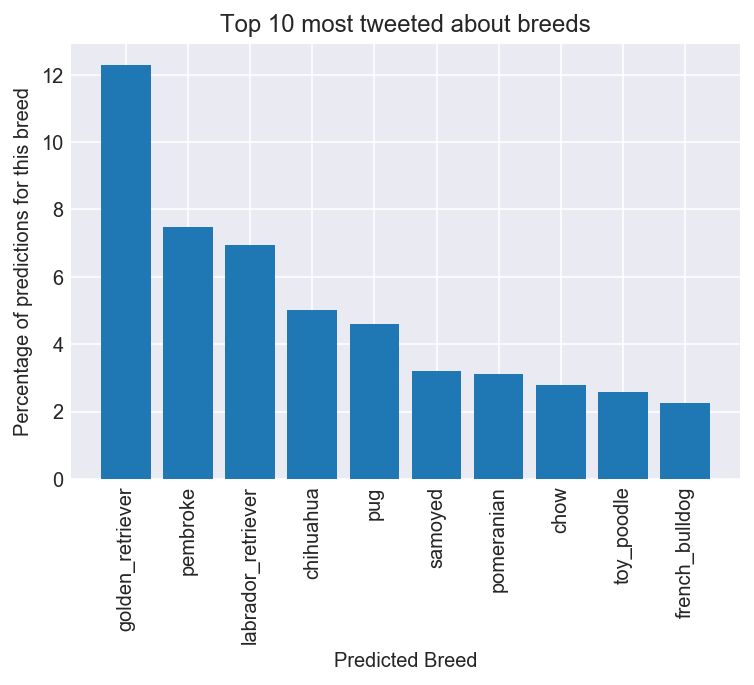

In [5]:
x = list(range(1, 11))
y = [dog_count * 100 / num_predicted for dog_count in sorted_dog_counts.tolist()[1:11]]
xticks =  sorted_dog_counts.keys().tolist()[1:11]
plt.xticks(x, xticks, rotation='vertical')
plt.title('Top 10 most tweeted about breeds')
plt.xlabel('Predicted Breed')
plt.ylabel('Percentage of predictions for this breed')
plt.bar(x, y)
plt.show();

In [6]:
# Average rating when grouped by predicted dog
top_10_rated_breeds = df_twtr_joined_clean.groupby('predicted_dog')['rating_numerator'].mean().sort_values(ascending=False)
top_10_rated_breeds.head(10)

predicted_dog
afghan_hound              13.000000
curly-coated_retriever    13.000000
saluki                    13.000000
briard                    12.500000
tibetan_mastiff           12.333333
unknown                   12.175979
border_terrier            12.000000
irish_setter              12.000000
irish_water_spaniel       12.000000
bluetick                  12.000000
Name: rating_numerator, dtype: float64

# Rooting for the Under"Dog" (pun intended)

The second highest rated dog got a lot more retweets and favorites compared to the number 1 rated dog.

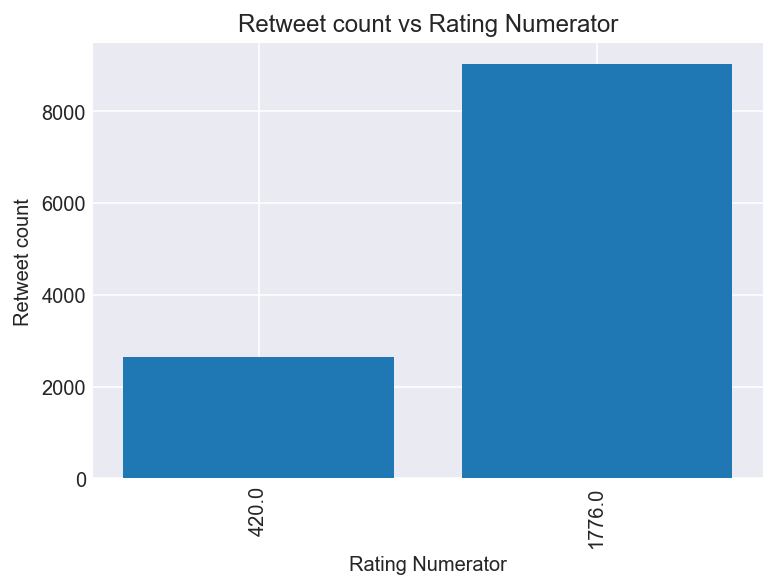

In [7]:
top_2_rating = df_twtr_joined_clean.rating_numerator.sort_values(ascending=False).tolist()[0:2]
top_2_rating.reverse()
highest_rated_row = df_twtr_joined_clean.query('rating_numerator == @top_2_rating[0]')
second_highest_rated_row = df_twtr_joined_clean.query('rating_numerator == @top_2_rating[1]')
y_retweets = [second_highest_rated_row.retweet_count.tolist()[0]]
y_retweets.append(highest_rated_row.retweet_count.tolist()[0])
x = list(range(1,3))
plt.xticks(x, top_2_rating, rotation='vertical')
plt.title('Retweet count vs Rating Numerator')
plt.xlabel('Rating Numerator')
plt.ylabel('Retweet count')
plt.bar(x, y_retweets)
plt.show();

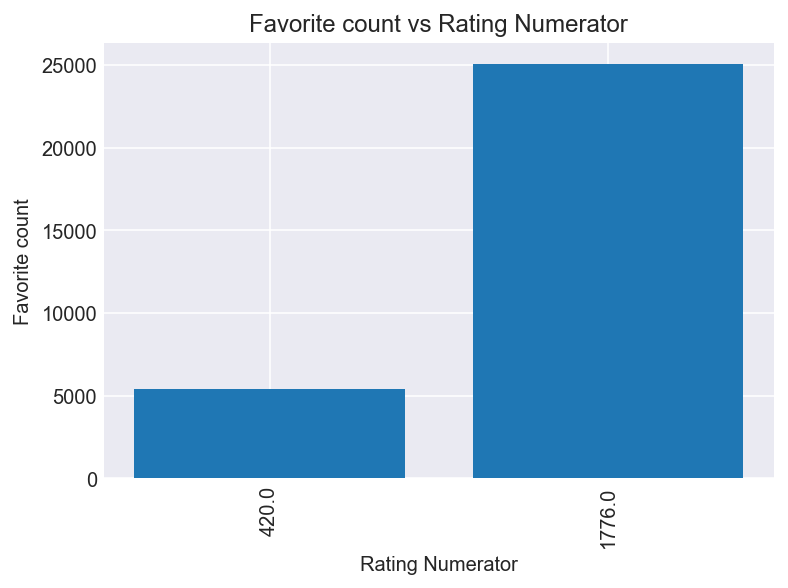

In [8]:
y_favorites = [second_highest_rated_row.favorite_count.tolist()[0]]
y_favorites.append(highest_rated_row.favorite_count.tolist()[0])
plt.xticks(x, top_2_rating, rotation='vertical')
plt.title('Favorite count vs Rating Numerator')
plt.xlabel('Rating Numerator')
plt.ylabel('Favorite count')
plt.bar(x, y_favorites)
plt.show();

This gives a good glimpse of the doggie landscape on WeRateDogs.